In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

## Data Sourcing

In [97]:
'''inital data sourcing'''

data = pd.read_csv('https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/cleaned_merged_seasons.csv')

/var/folders/c2/y0gmhjgn52s4fjvr1c_0n5_c0000gp/T/ipykernel_42269/2132138864.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/cleaned_merged_seasons.csv')


In [98]:
data

,Unnamed: 0,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,...,2.0,0.0,0,0,0,0,55,False,0,1
1,1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,...,1.0,0.0,1,0,0,0,60,True,0,1
2,2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,...,3.0,23.0,2,0,0,0,80,True,0,1
3,3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,...,1.0,0.0,0,0,0,0,50,False,0,1
4,4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,...,1.0,0.0,1,0,0,0,45,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98397,98397,2021-22,Wilfred Ndidi,MID,Leicester,0,0,0,0,0.0,...,4.0,0.0,0,-202,22,224,48,True,0,38
98398,98398,2021-22,Matt Ritchie,DEF,Newcastle,0,0,3,0,0.0,...,1.0,0.0,1,143,396,253,49,False,0,38
98399,98399,2021-22,Nathan Redmond,MID,Southampton,0,0,5,0,0.0,...,4.0,0.0,2,455,683,228,59,False,0,38
98400,98400,2021-22,Mathew Ryan,GK,Brighton,0,0,0,0,0.0,...,3.0,0.0,0,-2,0,2,45,True,0,38


## Exploring Data 

In [99]:
'''exploring columns'''
data.columns

Index(['Unnamed: 0', 'season_x', 'name', 'position', 'team_x', 'assists',
       'bonus', 'bps', 'clean_sheets', 'creativity', 'element', 'fixture',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'opp_team_name',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'yellow_cards', 'GW'],
      dtype='object')

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98402 entries, 0 to 98401
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         98402 non-null  int64  
 1   season_x           98402 non-null  object 
 2   name               98402 non-null  object 
 3   position           98402 non-null  object 
 4   team_x             48930 non-null  object 
 5   assists            98402 non-null  int64  
 6   bonus              98402 non-null  int64  
 7   bps                98402 non-null  int64  
 8   clean_sheets       98402 non-null  int64  
 9   creativity         98402 non-null  float64
 10  element            98402 non-null  int64  
 11  fixture            98402 non-null  int64  
 12  goals_conceded     98402 non-null  int64  
 13  goals_scored       98402 non-null  int64  
 14  ict_index          98402 non-null  float64
 15  influence          98402 non-null  float64
 16  kickoff_time       984

## Investigating data for an Individual

In [101]:
'''isolating data for a given player by season'''

kane = data[data['name'] == 'Harry Kane']
kane_agg = kane.groupby(by = 'season_x').agg({'goals_scored': 'sum', 'bps': 'sum', 'creativity': 'sum', 'assists': 'sum', 
                                 'clean_sheets': 'sum', 'threat': 'sum', 'value': 'max', 
                                 'yellow_cards': 'sum', 'red_cards': 'sum', 'expected_goals': 'sum', 'expected_assists': 'sum', 
                                'penalties_missed': 'sum', 
                                 'penalties_saved': 'sum', 'total_points': 'sum'})
kane_agg

,goals_scored,bps,creativity,assists,clean_sheets,threat,value,yellow_cards,red_cards,penalties_missed,penalties_saved,total_points
season_x,,,,,,,,,,,,
2016-17,29,920,548.4,7,14,1530.0,119,3,0,1,0,224
2017-18,29,781,502.1,2,15,2355.0,131,5,0,1,0,217
2018-19,17,561,430.0,6,9,1359.0,126,5,0,0,0,160
2019-20,18,587,391.0,2,6,1071.0,111,4,0,0,0,158
2020-21,23,880,659.1,14,12,1585.0,119,1,0,0,0,242
2021-22,16,657,629.1,11,13,1609.0,126,5,0,0,0,185


In [10]:
'''taking only the stats we want'''

kane = kane[['goals_scored', 'bps', 'creativity', 'assists', 'clean_sheets', 'threat', 
      'value', 'yellow_cards', 'red_cards', 'penalties_missed', 'penalties_saved', 'total_points']]

<AxesSubplot: >

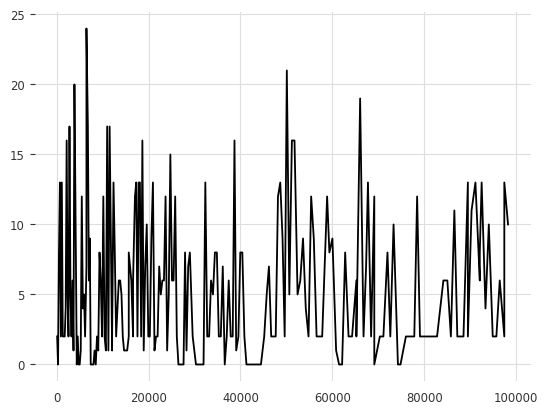

In [12]:
'''viewing performance'''

kane['total_points'].plot()

## Interacting with the FPL API

In [3]:
base_url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [4]:
response = requests.get(base_url)

In [5]:
base_json = response.json()

In [6]:
base_json

{'events': [{'id': 1,
   'name': 'Gameweek 1',
   'deadline_time': '2022-08-05T17:30:00Z',
   'average_entry_score': 57,
   'finished': True,
   'data_checked': True,
   'highest_scoring_entry': 7309963,
   'deadline_time_epoch': 1659720600,
   'deadline_time_game_offset': 0,
   'highest_score': 119,
   'is_previous': False,
   'is_current': False,
   'is_next': False,
   'cup_leagues_created': False,
   'h2h_ko_matches_created': False,
   'chip_plays': [{'chip_name': 'bboost', 'num_played': 170273},
    {'chip_name': '3xc', 'num_played': 348557}],
   'most_selected': 28,
   'most_transferred_in': 105,
   'top_element': 366,
   'top_element_info': {'id': 366, 'points': 15},
   'transfers_made': 0,
   'most_captained': 283,
   'most_vice_captained': 318},
  {'id': 2,
   'name': 'Gameweek 2',
   'deadline_time': '2022-08-13T10:00:00Z',
   'average_entry_score': 57,
   'finished': True,
   'data_checked': True,
   'highest_scoring_entry': 3977474,
   'deadline_time_epoch': 1660384800,
   

In [7]:
elements_df = pd.DataFrame(base_json['elements'])

In [8]:
elements_df.keys()

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

## Getting ID for all players

In [56]:
'''building a dataframe for searching for the ids necessary for the API to function'''
dct=[]

for x in elements_df.index:
    first_name = elements_df.first_name[x]
    second_name = elements_df.second_name[x]
    player_id = elements_df.id[x]

    player_dict = {'name': first_name + ' ' + second_name,
               'player_id' : player_id}
    dct.append(player_dict)

In [65]:
player_id_df = pd.DataFrame(dct)
player_id_df

,name,player_id
0,Cédric Alves Soares,1
1,Granit Xhaka,3
2,Mohamed Elneny,4
3,Rob Holding,5
4,Thomas Partey,6
...,...,...
682,Boubacar Traoré,629
683,Nathan Fraser,657
684,Harvey Griffiths,658
685,Dexter Lembikisa,664


## Getting Stats for the last Gameweek

In [124]:
'''pulls stats only for most recent gameweek to be X for model'''

def get_last_gameweek(x):
    url = f'https://fantasy.premierleague.com/api/element-summary/{x}/'
    request = requests.get(url)
    r_json = request.json()
    r_json_history_df = pd.DataFrame(r_json['history'])
    return r_json_history_df.tail(1)

In [125]:
get_last_gameweek(427)

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,transfers_balance,selected,transfers_in,transfers_out
17,427,185,7,16,False,2023-01-04T20:00:00Z,0,4,19,90,...,1,0.41020,0.28827,0.69847,0.79280,116,-77118,3068339,74728,151846


In [107]:
'''Allows you to search by name and returns only relevant columns for model, the same as the train data'''

def players_last_week(name):
    p_id = player_id_df.loc[player_id_df['name'] == name].values[0][1]
    return get_last_gameweek(p_id)[['goals_scored', 'bps', 'creativity', 'assists', 'clean_sheets',
      'threat', 'value', 'yellow_cards', 'red_cards', 'expected_goals', 'expected_assists', 
    'penalties_missed', 'expected_goals_conceded',
       'penalties_saved', 'total_points']]
    

In [131]:
players_last_week('Harry Kane')

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,transfers_balance,selected,transfers_in,transfers_out
17,427,185,7,16,False,2023-01-04T20:00:00Z,0,4,19,90,...,1,0.41020,0.28827,0.69847,0.79280,116,-77118,3068339,74728,151846


## Next Steps for Project:

Go back to original data and set it up in the same way as the API. Need to structure the data in such a way that the next Gameweeks points are replacing the current gameweeks points. This will become our Y and other variables our X. Then we can introduce the model, train it on our data and test the accuracy against our train segment before having a go at predicting some future points for the next gameweeks.

Next, we can try refining our variables and models. I